In [ ]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# fetch the dataset from the yahoo finance library

In [ ]:
START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [ ]:
data = load_data('HDFCBANK.NS')
df=data
df.head()

/tmp/ipython-input-4-2158140052.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, START, TODAY)
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS
0,2010-01-04,150.596451,152.609464,149.435434,150.093191,3050490
1,2010-01-05,150.728897,152.300460,150.534658,150.976108,8386600
2,2010-01-06,150.830444,151.859018,149.042561,151.329272,6639840
3,2010-01-07,151.223297,156.132225,150.234452,156.132225,6123980
4,2010-01-08,151.421982,152.159197,150.181507,151.152690,7085900


In [ ]:
df = df.drop(['Date'], axis = 1)
df.head()

/tmp/ipython-input-6-3502562368.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS
0,150.596451,152.609464,149.435434,150.093191,3050490
1,150.728897,152.300460,150.534658,150.976108,8386600
2,150.830444,151.859018,149.042561,151.329272,6639840
3,151.223297,156.132225,150.234452,156.132225,6123980
4,151.421982,152.159197,150.181507,151.152690,7085900


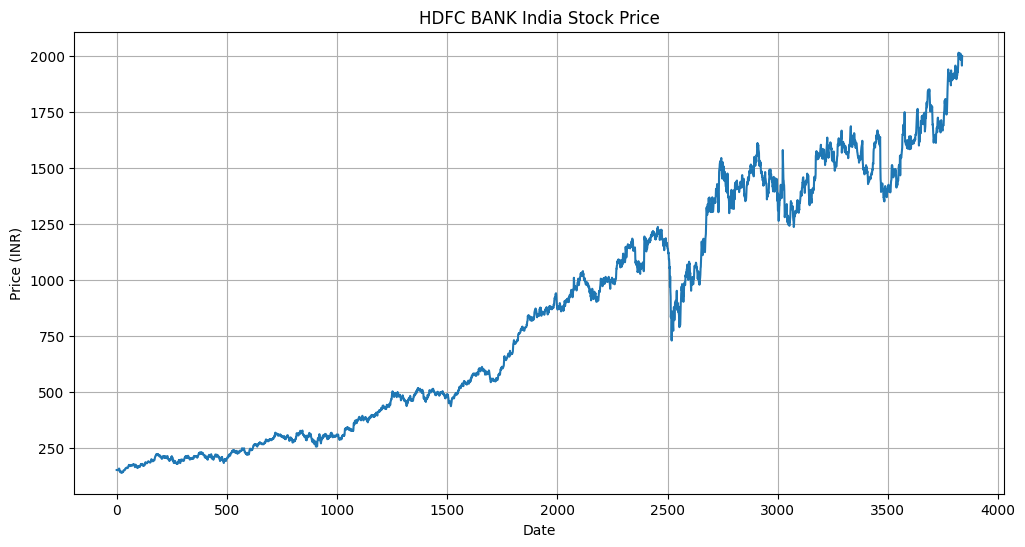

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("HDFC BANK India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [ ]:
df


Price,Close,High,Low,Open,Volume
Ticker,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS
0,150.596451,152.609464,149.435434,150.093191,3050490
1,150.728897,152.300460,150.534658,150.976108,8386600
2,150.830444,151.859018,149.042561,151.329272,6639840
3,151.223297,156.132225,150.234452,156.132225,6123980
4,151.421982,152.159197,150.181507,151.152690,7085900
...,...,...,...,...,...
3833,1995.500000,2003.599976,1973.000000,1973.000000,7249084
3834,1996.300049,2022.699951,1992.599976,2018.000000,8997306
3835,1986.900024,2004.800049,1982.699951,2004.000000,11264579


Plotting moving averages of 100 day

In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,HDFCBANK.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3833,1855.231759
3834,1858.208131
3835,1861.034122
3836,1863.524066


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

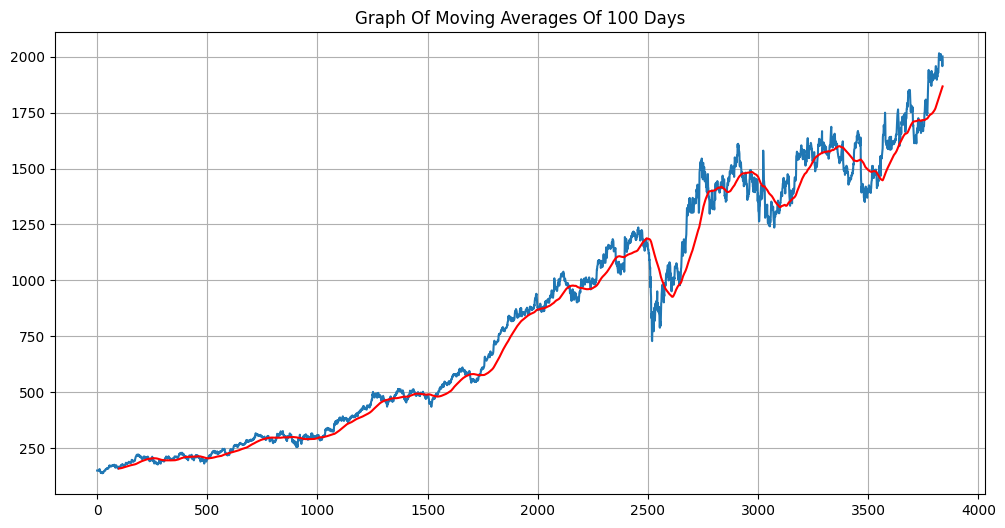

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')


# ML Model (LSTM) and preprocessing

In [ ]:
train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2686, 6)
(1152, 6)


In [ ]:
train.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS
0,2010-01-04,150.596451,152.609464,149.435434,150.093191,3050490
1,2010-01-05,150.728897,152.300460,150.534658,150.976108,8386600
2,2010-01-06,150.830444,151.859018,149.042561,151.329272,6639840
3,2010-01-07,151.223297,156.132225,150.234452,156.132225,6123980
4,2010-01-08,151.421982,152.159197,150.181507,151.152690,7085900


In [ ]:
test.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS
2686,2020-11-23,1324.218262,1351.802233,1305.939757,1343.588752,12623318
2687,2020-11-24,1365.617798,1372.074666,1331.292286,1336.941958,20077200
2688,2020-11-25,1332.004639,1390.495835,1326.497302,1378.056979,12076301
2689,2020-11-26,1354.650757,1359.730733,1317.001765,1343.588678,13971563
2690,2020-11-27,1368.134277,1373.024394,1344.111168,1359.541075,8997290


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
train_close = train.iloc[:, 2:3].values
test_close = test.iloc[:, 2:3].values


In [ ]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.01100635],
       [0.01075057],
       [0.01038516],
       ...,
       [1.        ],
       [0.98463406],
       [0.99166856]])

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(2586, 100, 1)

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Input

model = Sequential()
model.add(Input(shape=(x_train.shape[1], 1))) # Using Input layer
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 29s 272ms/step - loss: 0.0670 - mean_absolute_error: 0.1812
Epoch 2/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 42s 284ms/step - loss: 0.0065 - mean_absolute_error: 0.0539
Epoch 3/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 41s 283ms/step - loss: 0.0071 - mean_absolute_error: 0.0545
Epoch 4/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 41s 283ms/step - loss: 0.0052 - mean_absolute_error: 0.0483
Epoch 5/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 23s 283ms/step - loss: 0.0054 - mean_absolute_error: 0.0492
Epoch 6/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 41s 285ms/step - loss: 0.0049 - mean_absolute_error: 0.0460
Epoch 7/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 23s 284ms/step - loss: 0.0040 - mean_absolute_error: 0.0411
Epoch 8/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 23s 284ms/step - loss: 0.0050 - mean_absolute_error: 0.0464
Epoch 9/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 41s 290ms/step - loss: 0.0044 - mean_absolute_error: 0.0424
Epoch 10/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 41s 285ms/step - loss: 0.0044 - mean_absolute_error: 0.0440
Epoch 11/

In [ ]:
model.save('my_hdfc_keras_model.h5')

In [ ]:
test_close.shape

(1152, 1)

In [ ]:
past_100_days = pd.DataFrame(train_close[-100:])

In [ ]:
test_df = pd.DataFrame(test_close)

In [ ]:
final_df = pd.concat([past_100_days, test_df], ignore_index = True)

In [ ]:
final_df.head()

,0
0,1040.498055
1,1063.381597
2,1055.595468
3,1068.129346
4,1072.687161


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.06240637],
       [0.08425062],
       [0.07681811],
       ...,
       [0.98291305],
       [0.97546725],
       [0.98024017]])

In [ ]:
input_data.shape

(1252, 1)

# Testing the model

In [ ]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1152, 100, 1)
(1152,)


# Making prediction and plotting the graph of predicted vs actual values

In [ ]:
y_pred = model.predict(x_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step


In [ ]:
y_pred.shape

(1152, 1)

In [ ]:
y_test

array([0.35957217, 0.3789239 , 0.39650844, ..., 0.98291305, 0.97546725,
       0.98024017])

In [ ]:
y_pred

array([[0.21727444],
       [0.22338724],
       [0.2295568 ],
       ...,
       [0.9591564 ],
       [0.960225  ],
       [0.960497  ]], dtype=float32)

In [ ]:
scaler.scale_

array([0.00095458])

In [ ]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

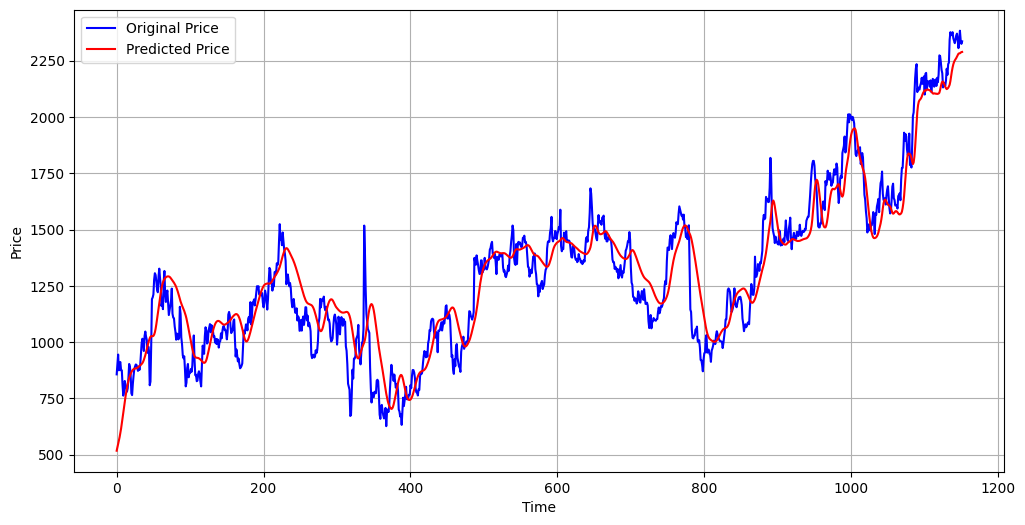

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 7.27%


In [ ]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.8851809569128057


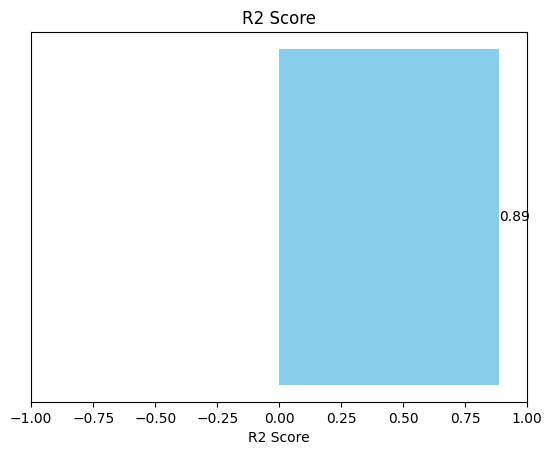

In [ ]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

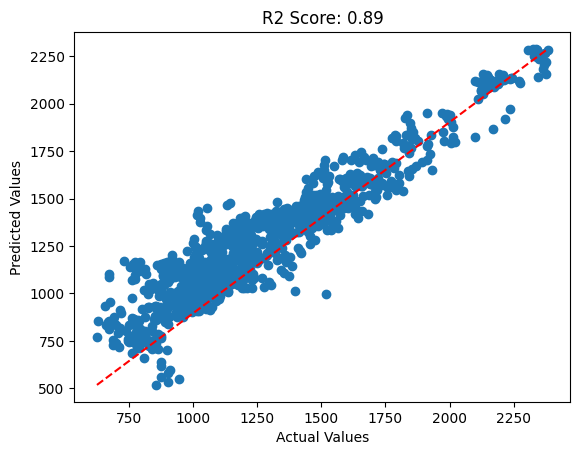

In [ ]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()